Project 1 - Alice Nix

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.


## Problem Statement

To determine if there is an association between admission to the UCLA graduate school and GPA among prospective students.  Examine the dataset using demographic data collected i.e., (gre, gpa, and prestige or rank).

#### 1. What is the outcome?

Answer: Admit (0 = "not admitted", 1 = "admitted")

#### 2. What are the predictors/covariates? 

Answer: GRE, GPA, Prestige

#### 3. What timeframe is this data relevent for?

Answer: It is not clearly defined or specified.

#### 4. What is the hypothesis?

Students with a higher GPA are more likely to be admitted into the UCLA graduate school compared to students with a lower GPA.

## Let's get started with our dataset

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

# read in the data as an excel spreadsheet
admissions = pd.read_excel('/Users/alicevnix/Desktop/admissions-1.xls')


In [3]:
admissions.head()



admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0

In [4]:
# look more closely at features of dataset
admissions.dtypes


admit         int64
gre         float64
gpa         float64
prestige    float64
dtype: object

In [6]:
type(admissions)


pandas.core.frame.DataFrame

In [7]:
# obtain number of rows and columns
admissions.shape


(400, 4)

In [8]:
# obtain descriptive statistics from dataset
admissions.describe()



admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000

In [9]:
# take a look at the standard deviation of each predictor
print (admissions.std())


admit         0.466087
gre         115.628513
gpa           0.380630
prestige      0.945333
dtype: float64


In [10]:
# take a look at the median of each predictor - gain a sense of the center of the distribution 
print (admissions.median())



admit         0.000
gre         580.000
gpa           3.395
prestige      2.000
dtype: float64


In [11]:
# total count or frequency of a categorical predictor
admissions.prestige.count()


399

In [12]:
admissions.admit.count()


400

In [13]:
# frequency table cutting presitge and whether or not someone was admitted
print (pd.crosstab(admissions['admit'], admissions['prestige'], rownames=['admit'], margins=True))


prestige  1.0  2.0  3.0  4.0  All
admit                            
0          28   97   93   55  273
1          33   53   28   12  126
All        61  150  121   67  399


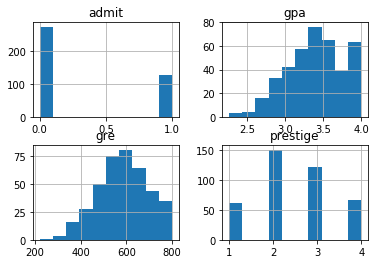

In [29]:
# plot the predictors, we use a histogram because they are numeric
admissions.hist()
pl.show()



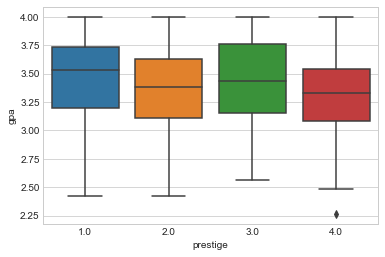

In [53]:
import seaborn as sns
%matplotlib inline

# basic boxplot to identify potential outliers - visual representation of IQR
# make boxplot for one continuous variable and several groups

sns.boxplot( x=admissions["prestige"], y=admissions["gpa"] )
plt.show()




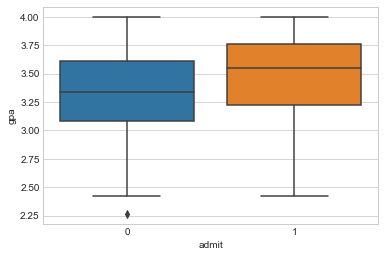

In [55]:
sns.boxplot( x=admissions["admit"], y=admissions["gpa"] )
plt.show()


#### 1. Create a data dictionary 

Variable | Description | Type of Variable
---| ---| ---
Admit| 0 = not admitted 1 = admitted | categorical
GRE | GRE score 200-800 | continuous 
GPA | GPA 0-4.0 | continuous
Prestige | 1= high prestige 2 = good prestige 3= low prestige 4= not prestigious | categorical


We would like to explore the association between X and Y 

In [14]:
# pairwise correlations of variables using a matrix
print(admissions.corr())


             admit       gre       gpa  prestige
admit     1.000000  0.182919  0.175952 -0.241355
gre       0.182919  1.000000  0.382408 -0.124533
gpa       0.175952  0.382408  1.000000 -0.059031
prestige -0.241355 -0.124533 -0.059031  1.000000


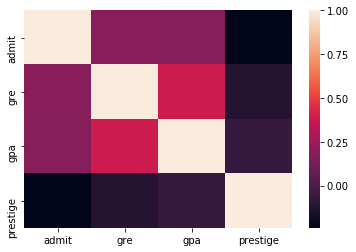

In [30]:
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix
corr = admissions.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


/Users/alicevnix/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


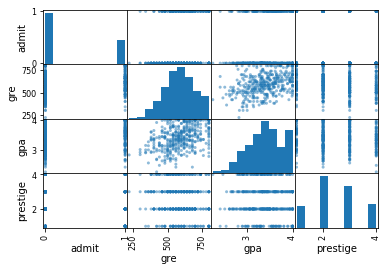

In [49]:
# generate a scatterplot matrix
import matplotlib.pyplot as plt
import pandas as np
from pandas.tools.plotting import scatter_matrix

scatter_matrix(admissions)
plt.show()


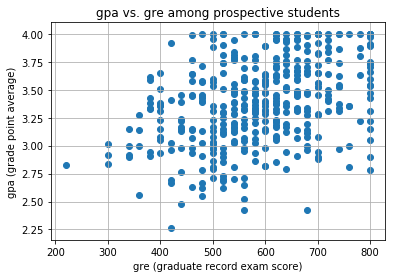

In [31]:
# plot a simple scatterplot to look at relationship between predictors

plt.scatter(admissions['gre'], admissions['gpa'])
plt.title("gpa vs. gre among prospective students")
plt.xlabel("gre (graduate record exam score)")
plt.ylabel("gpa (grade point average)")
plt.grid(True)
plt.show()


### Exploratory Analysis Plan

#### 1. What are the goals of the exploratory analysis? 

Answer: 1) To examine all of the variables (i.e., distribution) that we intend to use in our analysis, and to check if transformations of variables are needed before we fit the model.  2) Also to determine if there is any missing data.

#### 2a. What are the assumptions of the distribution of data? 

Answer: Normality

#### 2b. How will determine the distribution of your data? 

Answer: Histograms, q-q plots, and density plots.

#### 3a. How might outliers impact your analysis? 

Answer:  Outliers can skew the results.

#### 3b. How will you test for outliers? 

Answer: Boxplot is one simple method.

#### 4a. What is collinearity? 

Answer:  In the presence of similar and high correlations among predictor variables (i.e., multicollinearity), leading to unreliable and unstable estimates of regression coefficients, predictors are considered not to be independent.

#### 4b. How will you test for colinearity? 

Answer: Since this is not a linear regression problem, we normally cannot check variation inflation factors (VIFs), we can use a correlation matrix.

#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer: 1) Check for any missing values in the dataset - remove. 2) Check for any outliers in the dataset - remove. 3) Examine the distribution of the dataset by generating graphs and descriptive statistics (univariate). 4) Conduct a few bivariate analyses to examine relationships between predictors as well as the independent variable of interest and the dependent variable. 5) Lastly, check for multicollinearity (high correlations) between predictors. 6) If necessary, after steps 1-5 are complete, perform any transformations on the data before fitting it to the appropriate model.

## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model

### Logistic Regression

We are interested in modeling the probability that Y belongs to a particular category.  Outcome variable is binary.
1) Check for any confounders, logistic regression controls or adjusts for it.
2) Check for any interaction by including interaction terms in the model.

### Logistic Regression Equation

In [15]:
from IPython.display import display, Math, Latex
display(Math(r'logit(p) = log(p/1-p)=ln(p/1-p)'))


<IPython.core.display.Math object>

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as sm

In [17]:
# Example analysis would be to fit a logistic regression model
model_data = sm.logit('admit ~ gpa + gre + C(prestige)', data=admissions).fit()


Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


In [18]:
model_data.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Tue, 23 Jan 2018   Pseudo R-squ.:                 0.08166
Time:                        14:06:22   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.8769      1.142     -3.393      0.001      -6.116      -1.638
C(prestige)[T.2.0]    -0.6801      0.317     -2.146      0.032      -1.301      -0.059
C(prestige)[T.3.0]    -1.3387      0.345     -3.882      0.000      -2.015      -0.663
C(prestige)[T.4.0]    -1.5534      0.417     -3.721      0.000      -2.372      -0.735
gpa                    0.7793      0.333      2.344      0.019       0.128       1.431
gre                    0.0022      0.001      2.028      0.043    7.44e-05       0.004
======================================================================================
"""

In [19]:
# Look at the regression coefficient estimates
model_data.params



Intercept            -3.876854
C(prestige)[T.2.0]   -0.680137
C(prestige)[T.3.0]   -1.338677
C(prestige)[T.4.0]   -1.553411
gpa                   0.779337
gre                   0.002218
dtype: float64

In [21]:
# Look at the confidence intervals 
model_data.conf_int()


0         1
Intercept          -6.116077 -1.637631
C(prestige)[T.2.0] -1.301337 -0.058936
C(prestige)[T.3.0] -2.014579 -0.662776
C(prestige)[T.4.0] -2.371624 -0.735197
gpa                 0.127619  1.431056
gre                 0.000074  0.004362